In [112]:
import pandas as pd

In [113]:
data = pd.read_csv('data_tweet_ku.csv')
data.head()

,tweets
0,RT @TrollFootball: 4 things are certain in lif...
1,RT @FootyHumour: Man City to UEFA before every...
2,The Reds are looking to win their seventh Euro...
3,Eric Cantona speech: humans 'will become etern...
4,RT @NOT_MOTD: Man City in the UEFA offices mak...


In [114]:
data.shape

(500, 1)

In [115]:
nlink = 0
for tw in data.tweets.tolist():
    if 'http' in tw:
        nlink += 1
nlink

491

In [116]:
nolink_tweets = []

for tweet in data.tweets.tolist():
    # cleaning tweet from link
    words_without_links = [word for word in tweet.split() if 'http' not in word]
    nolink_tweets.append(' '.join(words_without_links))

data['clean_tweets'] = nolink_tweets

In [117]:
nlink = 0
for tw in data.clean_tweets.tolist():
    if 'http' in tw:
        nlink += 1
nlink

0

In [120]:
import re

In [121]:
# cleaning tweet from symbol
data['clean_tweets'] = data.clean_tweets.apply(lambda tw: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/S+)"," ",tw).split()))

In [122]:
data.head()

,tweets,clean_tweets
0,RT @TrollFootball: 4 things are certain in lif...,RT 4 things are certain in life 1 Death 2 Taxe...
1,RT @FootyHumour: Man City to UEFA before every...,RT Man City to UEFA before every Champions Lea...
2,The Reds are looking to win their seventh Euro...,The Reds are looking to win their seventh Euro...
3,Eric Cantona speech: humans 'will become etern...,Eric Cantona speech humans will become eternal...
4,RT @NOT_MOTD: Man City in the UEFA offices mak...,RT MOTD Man City in the UEFA offices making su...


In [123]:
import numpy as np

In [124]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# cleaning tweet from RT
data['clean_tweets'] = np.vectorize(remove_pattern)(data['clean_tweets'], "RT")

In [125]:
data.head()

,tweets,clean_tweets
0,RT @TrollFootball: 4 things are certain in lif...,4 things are certain in life 1 Death 2 Taxes ...
1,RT @FootyHumour: Man City to UEFA before every...,Man City to UEFA before every Champions Leagu...
2,The Reds are looking to win their seventh Euro...,The Reds are looking to win their seventh Euro...
3,Eric Cantona speech: humans 'will become etern...,Eric Cantona speech humans will become eternal...
4,RT @NOT_MOTD: Man City in the UEFA offices mak...,MOTD Man City in the UEFA offices making sure...


In [127]:
#!pip3 install textblob
from textblob import TextBlob

In [128]:
def gettweet_sentiment(tweet):
    analysis = TextBlob(tweet)

    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [129]:
# get sentiment with textblob
sentiment = []
for tw in data.clean_tweets:
    sentiment.append(gettweet_sentiment(tw))
data['sentiment'] = sentiment

In [130]:
data.head()

,tweets,clean_tweets,sentiment
0,RT @TrollFootball: 4 things are certain in lif...,4 things are certain in life 1 Death 2 Taxes ...,negative
1,RT @FootyHumour: Man City to UEFA before every...,Man City to UEFA before every Champions Leagu...,neutral
2,The Reds are looking to win their seventh Euro...,The Reds are looking to win their seventh Euro...,positive
3,Eric Cantona speech: humans 'will become etern...,Eric Cantona speech humans will become eternal...,neutral
4,RT @NOT_MOTD: Man City in the UEFA offices mak...,MOTD Man City in the UEFA offices making sure...,positive


In [131]:
# separate tweet based on sentiment
ptweets = data[data['sentiment'] == 'positive']
otweets = data[data['sentiment'] == 'neutral']
ntweets = data[data['sentiment'] == 'negative']
  
print('presentase tweet positif',str(np.round(ptweets.shape[0]/data.shape[0]*100,2))+'%')
print('presentase tweet netral',str(np.round(otweets.shape[0]/data.shape[0]*100,2))+'%')
print('presentase tweet negatif',str(np.round(ntweets.shape[0]/data.shape[0]*100,2))+'%')

presentase tweet positif 33.6%
presentase tweet netral 60.6%
presentase tweet negatif 5.8%


In [132]:
from wordcloud import WordCloud
from matplotlib import pyplot

In [133]:
tweet_netral_teks = ' '.join(otweets.clean_tweets.tolist())
tweet_positif_teks = ' '.join(ptweets.clean_tweets.tolist())
tweet_negatif_teks = ' '.join(ntweets.clean_tweets.tolist())

In [134]:
wordcloud_netral = WordCloud(background_color='white',collocations=False).generate(tweet_netral_teks)
wordcloud_positif = WordCloud(background_color='white',collocations=False).generate(tweet_positif_teks)
wordcloud_negatif = WordCloud(background_color='white',collocations=False).generate(tweet_negatif_teks)

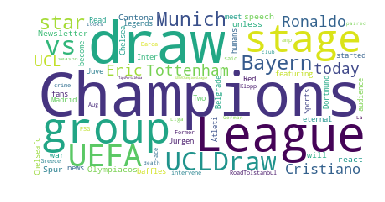

In [135]:
# word cloud netral tweets
pyplot.clf()
pyplot.imshow(wordcloud_netral)
pyplot.axis('off')
pyplot.show()

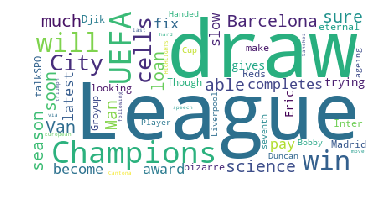

In [136]:
# word cloud positif tweets
pyplot.clf()
pyplot.imshow(wordcloud_positif)
pyplot.axis('off')
pyplot.show()

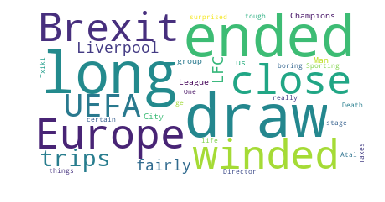

In [137]:
# word cloud negatif tweets
pyplot.clf()
pyplot.imshow(wordcloud_negatif)
pyplot.axis('off')
pyplot.show()